# Forecasting Aggregated Consumptions Using Python

Ridwan Ibrahim Ademola, MSc. Student Smart Cities and Communities

The objective of this project is to understand how Python libraries can help us develop different forecasting models. You'll see how the aggregated electricity demand of 21 households in Vaasa is predicted. The data includes the hourly electricity consumption of the households. Thirteen different forecasting models will be developed and the models will be compared in terms of their RMSE (Root Mean Squared Error).

To use this project, you need to run each cell one by one. E.g running cell 2 before Cell 1 may throw an error.
The results are communicated with barplot that compares the developed prediction models.


## Installing ANACONDA

You can download and install Anaconda for free on your personal computer by visiting [this link](https://www.anaconda.com/download)

## Preprocessing and visualization

**Install Required Libraries (Once)**:\
Start by installing the necessary libraries using pip (or conda) in Anaconda Prompt. You only need to install each library once:

In [ ]:
conda install numpy pandas seaborn matplotlib

In [ ]:
pip install openpyxl

The ebove command installs four essential libraries:

**NumPy**: Provides efficient tools for working with numerical data like arrays and matrices.\
**Pandas**: Offers powerful data structures like DataFrames and Series for data manipulation and analysis.\
**Seaborn**: Builds on top of Matplotlib for creating attractive and informative statistical graphics.\
**Matplotlib**: The fundamental library for generating various plots and visualizations in Python.

**Import Installed Libraries (Anytime)**:

Once installed, you can import these libraries in your Python scripts to use their functionalities:

In [2]:
# Import two libraries used for data manipulation
import numpy as np
import pandas as pd

# Important two libraries used for plotting
import seaborn as sns
import matplotlib.pyplot as plt
# We used specific import aliases like np and pd for brevity

**Importing Data: Hourly Power Consumption**

Now, let's import the data containing hourly active power consumption of 21 detached houses in 2019. There are two main options depending on your file location:

1. Importing from a specific path:

If your data is stored in a specific directory on your computer, use the following code:

file_path = r"Your path\Detached_house.xlsx"

df = pd.read_excel(file_path)

- Replace file_path with the actual location of your Excel file in the first option.


2. Importing from the same directory as the script:

If your data file is saved in the same directory as your Python script, you can omit the file path:

In [8]:
df = pd.read_excel ('Detached_house.xlsx')

In [ ]:
df

To view the first or last n rows of a DataFrame, you can use the df.head() or df.tail() methods respectively. Here's an example:

Here, I want to see the first 5 rows of my data frame named df:

In [ ]:
df.head(5)


In Python, if you want to find a value or values at a specific position (row and/or column) in a DataFrame, you can use the "pandas.DataFrame.iloc[row, column]" syntax.

For example, let's say you want to extract data after the third column of your DataFrame. Since indexing starts from 0, the index of the third column would be 2. Here's how you can do it:

In [ ]:
df.iloc[:,2:] #The data after the second column should be selected

The main goal of this assignment is to predict the total demand. So, we need to find out how much energy is being used every hour by adding up the consumption of houses. We'll do this by summing the values in each row and saving the total as a new column called "Sum" in the "df" data frame.

If we were adding up the values vertically, we'd use df.sum(axis=0). But since we're adding horizontally (axis=1), this code will calculate the total consumption for each hour and save it in the "Sum" column:

In [12]:
df['Sum'] = df.iloc[:,2:].sum(axis=1)

In [ ]:
df

Then we can check the first two rows and see whether the Sum column was added to the data frame:

In [ ]:
df.head(2)

We can visualize the pattern of aggregated consumption by plotting our data. The code below helps us understand how consumption has changed throughout the year 2019.

In [ ]:
df.plot('Date_Hour_start','Sum')

If you wish to retrieve a specific column by its name, you can simply use the syntax pandas.DataFrame["Column's name"]:

In [ ]:
df['Sum']

We can break down a date into different parts: the month of the year (like Jan, Feb, ...), the day of the week (like Monday, Tuesday, ...), and the hour of the day (from 1 to 24). These components can be really useful features for our model to predict demand. Essentially, we're using the month, day of the week, and hour of consumption to forecast demand. We'll save these features as columns in our DataFrame "df"

In [17]:
df['Date_Hour_start'] = pd.to_datetime(df['Date_Hour_start']) # correct the format of our date column
#Extract the month of dates
df['month'] = df['Date_Hour_start'].dt.month
#Extract the day of week of dates
df['week'] = df['Date_Hour_start'].dt.dayofweek
#Extract the hour of dates
df['hour'] = df['Date_Hour_start'].dt.hour

Then, we can check whether the features were correctly saved as columns, by seeing the first two rows:

In [ ]:
df.head(2)

We can easily drop the actual date columns, by using "pandas.DataFrame.drop(columns=[])"

In [19]:
df = df.drop(columns=['Date_Hour_start','Date_Hour_end'])

In [ ]:
df.head(2)

Some machine learning algorithms perform better when we normalize and standardize our data. Therefore, we transform the consumption data into the range of (0, 1) by using the MinMaxScaler() function within the scikit-learn package.

In [ ]:
pip install -U scikit-learn

In [ ]:
#If you haven't installed scikit-learn yet please run this code:
# conda install scikit-learn
#pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Normalize only consumption data
df.iloc[:,:] = scaler.fit_transform(df.iloc[:,:])

In [ ]:
df.head(2)

To develop machine learning models, we need to divide our data (dataframe df) into random train and test subsets. We'll allocate 90% of the data as train data and the remaining 10% as test data. We'll use the scikit-learn package for this purpose. First, we need to import this library and the function to split the data. We'll name the resulting subsets df_train and df_test to indicate our train and test datasets, respectively.

In [24]:
#Import the required function:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split (df, test_size=0.10) 

As we're working on different prediction models, it's important to have a way to compare their performance. We can use Root Mean Squared Error (RMSE) for this. RMSE measures the square root of the average of squared errors, showing the magnitude of prediction errors. Larger forecasting errors result in larger RMSE values.

In the Scikit-learn package, sklearn.metrics offers functions to calculate the RMSE of prediction models. We'll compute RMSE on both our train and test data. We'll use model names to differentiate between the developed models.

In [25]:
from sklearn.metrics import mean_squared_error
model_names, rmse_train, rmse_test = [], [], []

In the final stage, we're going to visualize the RMSE scores calculated for both the train and test data. To do this, we'll define a function called plot_scores. This function will create lists of model names along with their corresponding RMSE scores on the train and test sets, and then plot these values.

In [26]:
def plot_scores():
    # First, we create a dataframe that constains the model names, their RMSE on the train set and on the test data
    df_score = pd.DataFrame({'model_names' : model_names,
                             'rmse_train' : rmse_train,
                             'rmse_test' : rmse_test})
    #Then, we will change the dataframe shape in a way to have model name in one column (as a variable) and the rmse_train and rmse_test in the other columns (as the values of variable)
    
    df_score = pd.melt(df_score, id_vars=['model_names'], value_vars=['rmse_train', 'rmse_test'])
    
    #Then, a barplot is used to show the rmse indexes:

    plt.figure(figsize=(14, 12))
    sns.barplot(y="model_names", x="value", hue="variable", data=df_score)
    plt.show()

Also, we may need a figure to compare our forecast values with the real values of our test set. The following function is defined to compare the obtained prediction with the real values:

In [27]:
def plot_predictions(data):
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=data)
    plt.title("Predictions (orange) vs real values (blue) for the test data")
    plt.xlabel("hours of the test data")
    plt.ylabel("demand")
    plt.show()

# Regression models

In any dataset, the basic units of information are called datapoints. A datapoint consists of features and target(s). Features are properties of a datapoint that can be measured or computed automatically, usually represented by X. On the other hand, the target(s) are values of interest, often determined by a human expert and indicated by y.

In our case, we want the features to include the time (hour, month, and day of the week) when consumption happens, while the target represents the total hourly consumption (Sum column). Therefore, we extract the month, week, and hour columns to serve as features, and the hourly aggregated consumption (Sum) as our single target.

In [ ]:
X_train, y_train = df_train[['month', 'week', 'hour']], df_train['Sum']
X_test, y_test = df_test[['month', 'week', 'hour']], df_test['Sum']

#Check the shape of features and target for test and train datasets:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

Now it's time to import some forecasting models in the scikit-learn package:

**KNeighborsRegressor** is Regression-based model that works based on k-nearest neighbors. This non-parametric model uses proximity in order to make predictions about the grouping of an individual data point. It assumes that similar points can be found near one another. More information about this model can be found [here](https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20algorithm%2C%20also%20known%20as%20KNN%20or,of%20an%20individual%20data%20point.).

**LinearRegression** develops a linear equation that relates the target to the features. The objective of this model is to find coefficients of the linear equation in the training process. y = b1 + b2*X is a simple regression problem that aims to find b1 and b2 to predict y (target) based on features (Xs). More information can be found [here](https://machinelearningmastery.com/linear-regression-for-machine-learning/).

**Ridge** is used when our data suffers from multicollinearity which means that linearly independent variables (features) are highly correlated. More information can be found [here](https://www.mygreatlearning.com/blog/what-is-ridge-regression/)

**Lasso** is a linear regression that utilizes shrinkage. It performs both variable selection and regularization operation to improve the prediction accuracy. Regularization will make your model more generalized. More information can be found [here](https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/).

**ElasticNet** combines lasso and ridge regression models. It ties to learn from the shortcomings of Lasso and Ridge so to enhance the regularization of statistical models. More information can be found [here](https://corporatefinanceinstitute.com/resources/knowledge/other/elastic-net/)

**Ensemble learning-based models:**

**RandomForestRegressor** combines ensemble learning methods with the decision tree framework to make multiple randomly decision trees from the data. Them it considers the average results as the prediction output. More information can be found [here](https://towardsdatascience.com/random-forest-regression-5f605132d19d)

**GradientBoostingRegressor** builds subsequent models in which each model tries to rectify the errors of the previous model. It is in the form of an ensemble of weak prediction models which are typically weak-learner decision trees. More information can be found [here](https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/)

**ExtraTreesRegressor** fits a number of randomized decision trees on various sub-samples of the dataset. It is also called Extremely Randomized Trees. It is faster than Random Forest Regressor but it randomly chooses the split point and does not calculate the optimal one. More information can be found [here](https://machinelearningmastery.com/extra-trees-ensemble-with-python/)

**XGBRegressor** stands for Extreme Gradient Boosting. XGBRegressor is an optimized distributed gradient boosting that is designed to have high efficient and flexibility. More information can be found [here](https://xgboost.readthedocs.io/en/latest/index.html)

**lgbm.LGBMRegressor** stands for (Light Gradient Boosting Machine). It has also a gradient boosting framework working based on decision trees. It is designed to enhance the efficiency of the  model while reducing the memory usage. More information can be found [here](https://www.geeksforgeeks.org/lightgbm-light-gradient-boosting-machine/)

The following packages should be imported in order to develop above models:

In [ ]:
pip install xgboost

In [ ]:
pip install lightgbm

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

# If you haven't installed these packages before, please run these two lines as well:
#pip install xgboost
#pip install lightgbm
import xgboost as xgb
import lightgbm as lgbm

Then, function "get_rmse" is defined to calculate the RMSE on both train and test datasets. Afterward, the function prints the RMSE of the models:

In [39]:
def get_rmse(reg, model_name):
    """Print the score for the model passed in argument and retrun scores for the train/test sets"""
    
    y_train_pred, y_pred = reg.predict(X_train), reg.predict(X_test)
    rmse_train, rmse_test = np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_pred))
    print(model_name, f'\t - RMSE on Training  = {rmse_train:.2f} / RMSE on Test = {rmse_test:.2f}')
    
    return rmse_train, rmse_test

Then, the models are listed,  a list of scores is defined as well, the model is trained and the rmse is calculated: 

In [ ]:
# list of all models mentioned above
model_list = [
    LinearRegression(), Lasso(), Ridge(), ElasticNet(),
    RandomForestRegressor(), GradientBoostingRegressor(), ExtraTreesRegressor(),
    xgb.XGBRegressor(), lgbm.LGBMRegressor(), KNeighborsRegressor()
             ]

# list of names and scores for the train / test
model_names.extend([str(m)[:str(m).index('(')] for m in model_list])


for model, name in zip(model_list, model_names):
    #fit the models (train them)
    model.fit(X_train, y_train)
    #calculate the rmse using the function we already defined
    sc_train, sc_test = get_rmse(model, name)
    rmse_train.append(sc_train)
    rmse_test.append(sc_test)

**Polynomial regression** models the relationship between the feature x and the label y as an nth degree polynomial in x. More information can be found in its [Wikipedia](https://en.wikipedia.org/wiki/Polynomial_regression#:~:text=In%20statistics%2C%20polynomial%20regression%20is,nth%20degree%20polynomial%20in%20x.). We develop a polynomial regression model using PolynomialFeaturesGenerate. It consists of all polynomial combinations of the features with degree less than or equal to the specified degree. Here, we want to develop a model with degree less than 4:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Sequentially apply a list of PolynomialFeatures(degree=4) and LinearRegression()
poly_lin_reg = Pipeline([
    ("poly_feat", PolynomialFeatures(degree=4)),
    ("linear_reg", LinearRegression())
])

#Train the model
poly_lin_reg.fit(X_train, y_train)

#get RMSE on both train and test dataset
sc_train, sc_test = get_rmse(poly_lin_reg, "Poly Linear Reg")

model_names.append('Poly Linear Reg')
rmse_train.append(sc_train)
rmse_test.append(sc_test)

Which model has the lowest RMSE?

If you found LGBMRegressor() to be the best prediction model, please leave the following section unchanged. Otherwise, replace LGBMRegressor() with the best model you obtained, and examine the real and predicted consumptions below.

In [ ]:
rfr = lgbm.LGBMRegressor()
rfr.fit(X_train, y_train)
y_pred = pd.DataFrame(rfr.predict(X_test))

y_test = pd.DataFrame(y_test)
y_test['prediction'] = y_pred.values

plot_predictions(data=y_test)

## RNN-based models

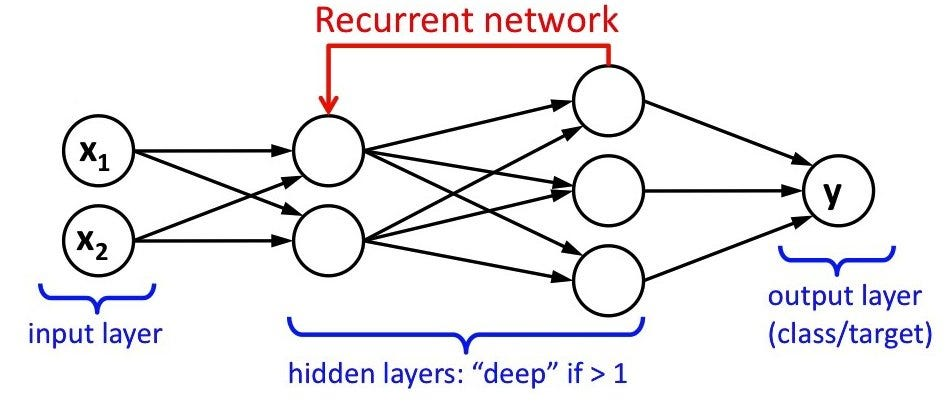


Recurrent neural network-based models are great for handling time-series data. They excel at predicting sequences by remembering important information from both current and past data points. This makes them very useful for datasets with a time-series feature. To start building RNN-based models, we first need to extract our target from the "df" dataframe.

In [43]:
data2 = df['Sum']

RNN-based models utilize past values of the target (y-1, y-2, ..., y-lookback) as features (x1, x2, ...) to predict the current target (y). Therefore, we need to create a function that incorporates past targets as new features for our model. In this scenario, our model relies on the previous 24 targets to predict the current target (Sum). Since our model only considers previous targets as features, each target corresponds to 24 features.

In [ ]:
def process_data(data, past):
    X = []
    for i in range(len(data)-past-1):
        #The previous 24 labels should be our new features
        X.append(data.iloc[i:i+past].values)
    return np.array(X)

#Looklack determine how many hours you wish your algorithm to look back on.
lookback = 24

y = data2[lookback+1:] 
X = process_data(data2, lookback)
X.shape, y.shape
#You can see each label corresponds to 24 features

Then, we split our data into the train and test subsets. Train subset includes 90% and test subset has 10% of the total data.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, shuffle=False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
pip install tensorflow


In [ ]:
pip install keras

### Simple RNN


RNNs use previous outputs (targets) as inputs (features) to predict the current output. You can find more information about RNN models [here](https://www.ibm.com/cloud/learn/recurrent-neural-networks).

The Keras module in TensorFlow is one of the best modules for developing RNN-based models. We will use the keras.Sequential() class, which is useful for stacking layers sequentially.

We define 3 layers to develop a simple RNN model:

- An input layer with a shape of (lookback,1).
- Two hidden layers with 32 units, which are simple RNN layers.
- An output layer (single output, one unit) with a linear activation function.

We don't need to explicitly define the input layer in our sequential model. Instead, we indicate the input shape in the first dense layer. Here, we have a single (lookback,1) input and a single output. We just need to specify a list of layers and pass them to keras.Sequential().

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, Dropout

In [51]:
def my_RNN():
    my_rnn = Sequential()
    my_rnn.add(SimpleRNN(units=32, return_sequences=True, input_shape=(lookback,1)))
    my_rnn.add(SimpleRNN(units=32, return_sequences=False))
    my_rnn.add(Dense(units=1, activation='linear'))
    return my_rnn

The method model.summary() provides:

The number of parameters (weights) in each layer.
The total number of parameters (weights) in the model.
The layers and their order in the model.
The output shape of each layer. 

In [ ]:
rnn_model = my_RNN()
rnn_model.summary()

After designing the network, we can compile our model using model.compile() function. In this function we need to specify:

- The optimizer algorithm that adjusts the weights of the NN
- The loss function that calculates the quality of weights' choice 

In this model, we will use adam optimizer and mse as a loss function.

 In the next step, model.fit() method is applied to train our network using X_train and y_train dataset while X_test and y_train can validate the model. Batch_size indicates the number of samples per gradient update, and epochs shows the number of times that our optimization algorithm utilizes the entire dataset for adjusting the weights.

In [ ]:
rnn_model.compile(optimizer= 'adam', loss='mean_squared_error')
rnn_model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64)

Then, we are interested to get RMSE on our train and test datasets.

In [ ]:
y_pred_train, y_pred_test = rnn_model.predict(X_train), rnn_model.predict(X_test)


In [ ]:
err_train, err_test = np.sqrt(mean_squared_error(y_train, y_pred_train)), np.sqrt(mean_squared_error(y_test, y_pred_test))
err_train, err_test

The obtained RMSE should be added into our models' list:

In [56]:
def append_results(model_name):
    model_names.append(model_name)
    rmse_train.append(err_train)
    rmse_test.append(err_test)

append_results("RNN")

The following plot visualizes the accuracy of the RNN forecasting model regarding our consumption test data:

In [ ]:
def plot_evolution():
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(X_train)), y_train, label='Train')
    plt.plot(np.arange(len(X_train), len(X_train)+len(X_test), 1), y_test, label='Test')
    plt.plot(np.arange(len(X_train), len(X_train)+len(X_test), 1), y_pred_test, label='Test prediction')
    plt.legend()
    plt.show()

plot_evolution()

Let's check how the RNN model predicts the consumption of the last 30 days:

In [ ]:
rnn_res = pd.DataFrame(zip(list(y_test), list(np.squeeze(y_pred_test))), columns =['real', 'pred'])
plot_predictions(data=rnn_res[-30*24:])

### GRU

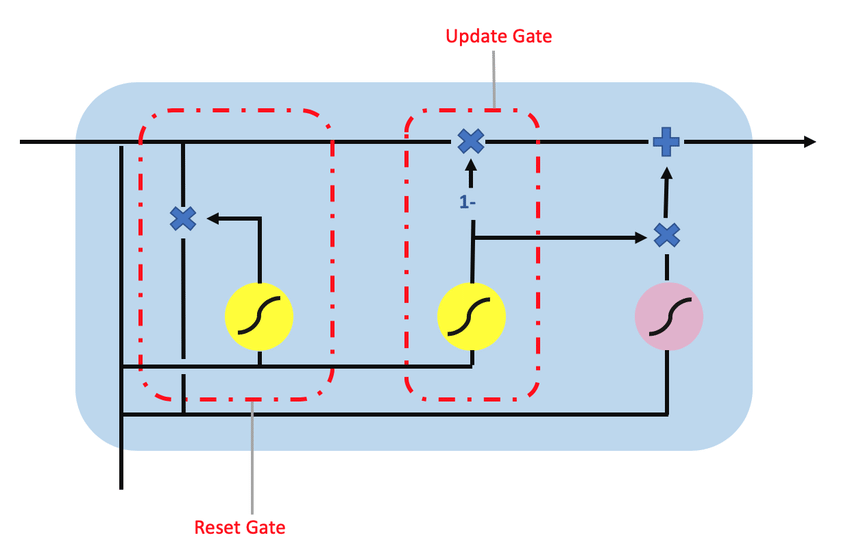

Gated Recurrent Unit is an RNN-based model that has two gates inside. The gates are reset and update gates.
Update gate decides whether the cell state needs to be updated with the current activation value. The reset gate decides if the state of previous cell is important. More information can be found [here](https://medium.com/analytics-vidhya/rnn-vs-gru-vs-lstm-863b0b7b1573)

Again keras.Sequential() class is used. We define four layers as follows:
- input layer with (lookback,24) shape
- first hidden layer with 32 units and relu activation function
- second hidden layer with 32 units and relu activation function
- output layer (single output==> one unit) with linear activation function

Again, adam is an optimizer and mse will be deployed as a loss function.

In [ ]:
from tensorflow.keras.layers import GRU

def my_GRU(input_shape):
    my_GRU = Sequential()
    my_GRU.add(GRU(units=32, return_sequences=True, activation='relu', input_shape=input_shape))
    my_GRU.add(GRU(units=32, activation='relu', return_sequences=False))
    my_GRU.add(Dense(units=1, activation='linear'))
    return my_GRU

gru_model = my_GRU((lookback,1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')
gru_model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

In [ ]:
y_pred_train, y_pred_test = gru_model.predict(X_train), gru_model.predict(X_test)
err_train, err_test = np.sqrt(mean_squared_error(y_train, y_pred_train)), np.sqrt(mean_squared_error(y_test, y_pred_test))
err_train, err_test

In [ ]:
append_results("GRU")
plot_evolution()

gru_res = pd.DataFrame(zip(list(y_test), list(np.squeeze(y_pred_test))), columns =['real', 'pred'])
plot_predictions(data=gru_res[-30*24:])

### LSTM

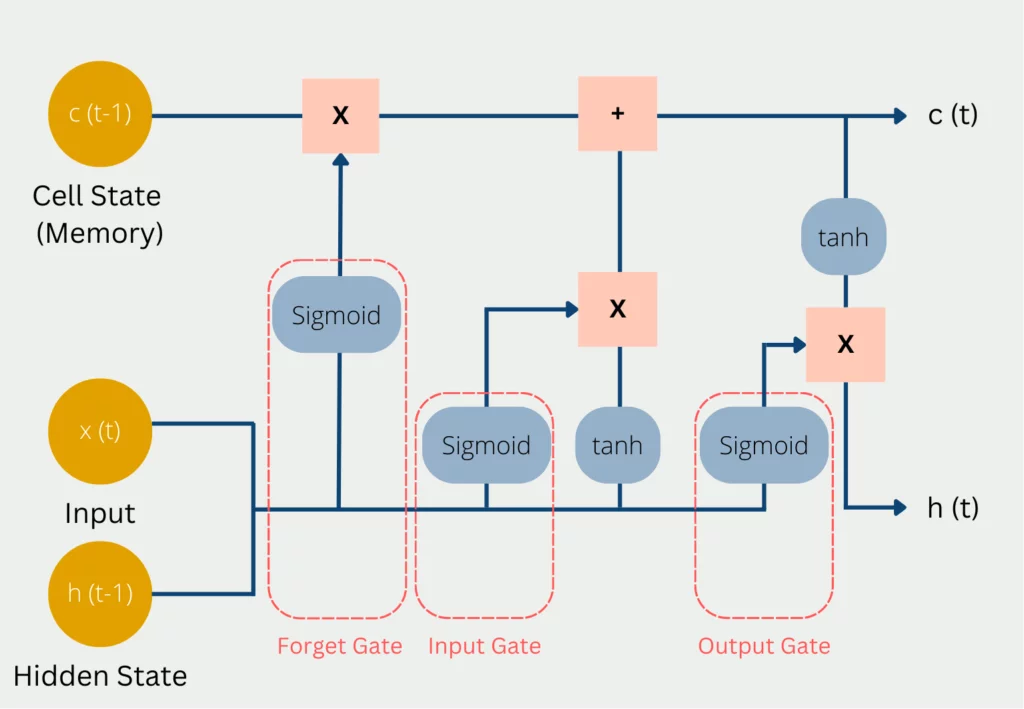

Long Short-Term Memory LSTMs are quite similar to GRU. However, they have three gates including input, forget and output gates. Forget gate decides whether the previous cell state  is kept or forgotten. Output gate determins the next hidden state.

We define the same architecture for LSTM:

In [ ]:
from tensorflow.keras.layers import LSTM

def my_LSTM(input_shape):
    my_LSTM = Sequential()
    my_LSTM.add(LSTM(units=32, return_sequences=True, activation='relu', input_shape=input_shape))
    my_LSTM.add(LSTM(units=32, activation='relu', return_sequences=False))
    my_LSTM.add(Dense(units=1, activation='linear'))
    return my_LSTM

lstm_model = my_LSTM((lookback,1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

In [ ]:
y_pred_train, y_pred_test = lstm_model.predict(X_train), lstm_model.predict(X_test)
err_train, err_test = np.sqrt(mean_squared_error(y_train, y_pred_train)), np.sqrt(mean_squared_error(y_test, y_pred_test))
err_train, err_test

In [ ]:
append_results("LSTM")
plot_evolution()

lstm_res = pd.DataFrame(zip(list(y_test), list(np.squeeze(y_pred_test))), columns =['real', 'pred'])
plot_predictions(data=lstm_res[-30*24:])

## Model comparison

Finally, all of the developed models will be compared to each other in terms of their calculated RMSE:

In [ ]:
plt.style.use('fivethirtyeight')
plot_scores()

Please include the above figure in your report. 

[Reference](https://www.kaggle.com/code/obrunet/solar-generation-forecast-part-3-3)